<a href="https://www.kaggle.com/code/ramsesmdlc/house-prices-linear-regression-normal-equation?scriptVersionId=139562549" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Import Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from pandas.plotting import scatter_matrix #draw a matrix of scatter plots.
from scipy import stats #draw Normal Probability Plot

from sklearn.base import BaseEstimator, TransformerMixin # base classes (provide common functionality and methods for all transformers and estimators)
from sklearn.impute import SimpleImputer # completing/replacing missing values
from sklearn.preprocessing import StandardScaler # Machine Learning (Scaling data) - Z-Score Normalization)
from sklearn.preprocessing import OneHotEncoder # Machine Learning (One Hot Encoder Categorical Attributes)
from sklearn.pipeline import Pipeline # Machine Learning (Pipeline class for numerical features)
from sklearn.compose import ColumnTransformer # Machine Learning (Transformation of: numerical features + categorical attributes)

from sklearn.linear_model import LinearRegression # Machine Learning (Linear Regression)
from sklearn.metrics import r2_score # Regression Score or Coefficient of Determination
from sklearn.metrics import mean_squared_error # Mean Squared Error (MSE) regression loss.

from sklearn.model_selection import train_test_split #split data into random train and test subsets.
from sklearn.linear_model import Ridge # Regularization of Lineal Model (Ridge Regression)
from sklearn.linear_model import Lasso # Regularization of Lineal Model (Lasso Regression)
from sklearn.linear_model import ElasticNet # Regularization of Lineal Model (ElasticNet)

<div class="alert alert-block alert-warning"><b>Point 0, 1:</b> In following steps we are going to apply several tehcniques, methods or procedures to check and assess the training dataset. Furthermore, in these stages we are not going to modify or edit the training dataset.</div>

# __0. Important__

Type of machine learning system to build:

1. Supervised Learning: __Linear Regression (Normal Equation)__
2. Batch Learning (also called "offline learning")
3. Model-based learning

Goal:
1. __Predict the "sales price" for each house__

# __1. Loading the Data - Training Dataset__

In [2]:
training_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# __2. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)__

There are a lot of variables of different types (object, int64, and float64) in the training set (80 to be precise). Therefore, conducting an exhaustive exploratory data analysis (EDA) of all features may not be worthwhile. 

> __<span style="color:#FF4500"> Non-metric variable = attributes, characteristics or categorical properties = type "object"</span>__

> __<span style="color:#FF4500">Metric variables = quantitavive data = type "int64" and/or type "float64"</span>__

The best approach would be to quickly identify the independent features (metric variables, to be precise) that have a strong Correlation Coefficient "r" (to be specific "Pearson" and/or "Spearman") with the dependent feature "SalePrice" and use them to develop the model. 

__<span style="color:#FF4500">Correlation coefficient "r": It measures how strength is the relationship between two metric variables. (Range: +1 to -1)</span>__

1. __<span style="color:#FF4500">Pearson correlation coefficient:</span>__

> It is computed using "raw data" values.

> Assumption N°1: Data from both variables follow normal distributions.

> Assumption N°2: Data have no outliers.

> Assumption N°3: Data is from a random or representative sample.

> Assumption N°4: Expect a "linear" relationship between the two variables.

2. __<span style="color:#FF4500">Spearman correlation coefficient:</span>__

> It is used when data fail to meet the assumptions of "Pearson correlation coefficient".

> It is computed from the "ranks" (e.g., from lowest to highest) of the data. For instance, if we have a set of data X1 = [400 100 300 200 10], then this set of data could be ranked as X1_Ranked = [5 2 4 3 1]; or a set of data X2 = [10 20 30 40 50], then this set of data could be ranked as X2_Ranked = [1 2 3 4 5]

> It measures the "monotonicity of relationships" (which are less restrictive than linear relationships) between a pair of variables. Each variable changes in only one direction but not necessarily at the same rate. 

> > Positive monotonic: when one variable increases, the other also increases (it does not have to be linear).

> > Negative monotonic: when one variable increases, the other decreases. (it does not have to be linear).

In [3]:
def QEDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_data.shape, "\n")
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
  training_data.info()
    
  #"Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the metric variables" of the dataframe
      #The code "select_dtypes" allow us to choose data points of the dataframe with specific datatypes.
          #In this case we are interested in datatypes of "int64" and "float64"
      #The output will be a "Series"  
  matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
  corr_Pearson_matrix1 = matrix_selection.corr()
  corr_Pearson_serie = corr_Pearson_matrix1["SalePrice"].sort_values(ascending=False)
  
  #"Spearman's Rank Correlation Coefficient of the metric variables" of the dataframe
      #The output will be a "Series"  
  matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
  corr_Spearman_matrix1 = matrix_selection.corr(method="spearman")
  corr_Spearman_serie = corr_Spearman_matrix1["SalePrice"].sort_values(ascending=False)

  # Print the dataframe to contrast the "Pearson's Correlation Coefficient" vs "Spearman's Rank Correlation Coefficient on metric variables"
    #Transforming the Series to a Dataframe
    #Reseting the index of the dataframes
    #Changing the head of the dataframes
    #Concatenate the dataframes
  corr_Pearson_df = pd.DataFrame(corr_Pearson_serie)
  corr_Spearman_df = pd.DataFrame(corr_Spearman_serie)

  corr_Pearson_df.reset_index(inplace=True)
  corr_Spearman_df.reset_index(inplace=True)

  corr_Pearson_df = corr_Pearson_df.rename(columns = {"index":"Metric Variable","SalePrice":"Pearson Correlation"})
  corr_Spearman_df = corr_Spearman_df.rename(columns = {"index":"Metric Variable","SalePrice":"Spearman Correlation"})

  print("\n" +'\033[1m','\033[94m', "Pearson vs Spearman Correlation Coefficient", '\033[0m' + "\n")
  corr_compare_df = pd.concat([corr_Pearson_df, corr_Spearman_df], axis=1)
  print(corr_compare_df.head(13))

# Call the function
QEDA(training_data)


  Shape of the dataframe:  (1460, 81) 


   Information of the dataframe:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     146

## __2.1. Analysis - Checking Assumptions of Multivariate Analysis (Assumption N°1: Linearity)__

1. __<span style="color:#FF4500">Linearity: "correlation" represents "linear" association between variables; therefore, "nonlinear" effects (cubic, exponential,...) will not be represented (which could lead to underestimate of the actual strength of the relationship). This assumption is the base of techniques such as "Multivariate Regression and Logistic Regression"</span>__

2. __<span style="color:#FF4500">Scaling Data or Feature Scaling:"</span>__

> **It is NOT the same concept as "Data Transformation"**

> It is recommended to **apply the "Scaling Data or Feature Scaling" BEFORE any "Transformation"**, considering that some transformation operate better after a "Scaling Data or Feature Scaling"

> It consist in the process of **"changing or altering" the features of a dataset to a "consistent range or scale"**. 

> This **makes the data comparable across the features** (avoiding the dominance of one variable over other during the training process), or it **makes the data more suitable for certain algorihtms** that are sensitive to the scale of the data.

> It helps to **reduce the effects of outliers.**

> It helps to **algorithms converge faster**.

> For instance, "Scaling Data" is helpful if we detect that the mean value of a "variable x1 = 10000" and the mean value of "variable x2 = 10", (in other words, the mean value of a "variable x1" and "variable x2" do not have "consistent range  or scale"). To solve this situation and get all the attributes at the same scale or range, we can apply some statistical techniques such as "Min-Max Scaling or also called Normalization" or "Standardization".

> Min-Max Scaling or Normalization" is found in scikit-learn as the function "MinMaxScaler()"***(i.e. we can this Feature Scaling function in a future Pipeline)***. This function will rescaled the attributes so they end up ranging from 0 to 1. 

> Standardization" is found in scikit-learn as the function "StandardScaler"***(i.e. we can this Feature Scaling function in a future Pipeline)***. This function will rescaled the attributes so they end up with a "mean value = 0" a "variance = 1".

3. __<span style="color:#FF4500">Data Transformation:"</span>__

> **It is NOT the same concept as "Scaling Data"**

> It could be **applied to one or both variables (dependent variable and independent variable) metric and non-metric** to improve its representation, **applying mathematical functions such as logarithm, exponential, cubic, dummy variables, Principal Component Analysis (PCA), Dimensionality Reduction**

> It would **change the shape of the data distribution.**

> It is sometimes **done to meet certain statistical assumptions (Normality, Homocedasticity, and Liniearity).**

4. __<span style="color:#FF4500">The ways to spot a "nonlinearity issues" are the followings:</span>__ 

> Option 1: (Bivariate Analysis) Use Standard or Spearman Coefficient (***as we did in the section "2. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)"***)

> Option 2: (Bivariate Analysis) Use Scatterplot of dependent variable and independent variable (***the interpretability of the results could be subjective***).

> Option 3: (Bivariate Analysis) Use regression analysis to see the residuals, which reflect the unexplained portion of the dependent variable, and check if our assumption of linear regression was right.

5. __<span style="color:#FF4500">Solution:</span>__ If it confirmed that we are dealing with "nonlinearity" issues we can apply the following techniques:

> Option N°1: ***Transforming the data*** of one or both variables (dependent variable and independent variable) to improve its representation, ***applying mathematical functions such as logarithm, exponential, cubic,...***. It will be necessary to apply ***Attribute Transformation in a future Pipeline)*** in some numerical attributes.

> Option N°2: Create a new variable or variables to represent the nonlinear relationship. It will be necessary to apply ***Attribute Transformation (i.e. apply some Attribute Combination in a future Pipeline)*** in some numerical attributes.

### __2.1.1. Conclusions__

1. Considering that out of the top 13 metric variables (i.e., metric variables with a Correlation Coefficient "r" > 0.50, which is a subjective assumption), ***have a "Spearman Correlation Coefficient" stronger than "Pearson Correlation Coefficient", we can assume that we are dealing with "a non-linear relationship"*** between the dependent variable and each one of the great majority of the independet metric variables.

2. Therefore we are going to develop the EDA of the top 13 metric variables (according to the "Spearman Correlation Coefficient"). 

> 12 independent variables

> 1 dependent variable (SalePrice)

# __3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)__

In [4]:
#Defining the training dataset to be use for fo the EDA
    #This definition is based on the results of section "2. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)"
    #To be specific we choose only the columns (13 columns to be precise) with metric variables and Spearman Correlation Coefficient" > 0.50
matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
training_dataX = matrix_selection[["SalePrice","OverallQual", "GrLivArea", "GarageCars","GarageArea", "TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd","GarageYrBlt","Fireplaces"]]


  Shape of the dataframe - some metric variables:  (1460, 13) 

  Head of the dataframe - some metric variables:  

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0       856         2             8       2003          2003       2003.0   
1      1262         2             6       1976          1976       1976.0   
2       920         2             6       2001          2002       2001.0   
3       961         1             7       1915          1970       1998.0   
4      1145         2             9

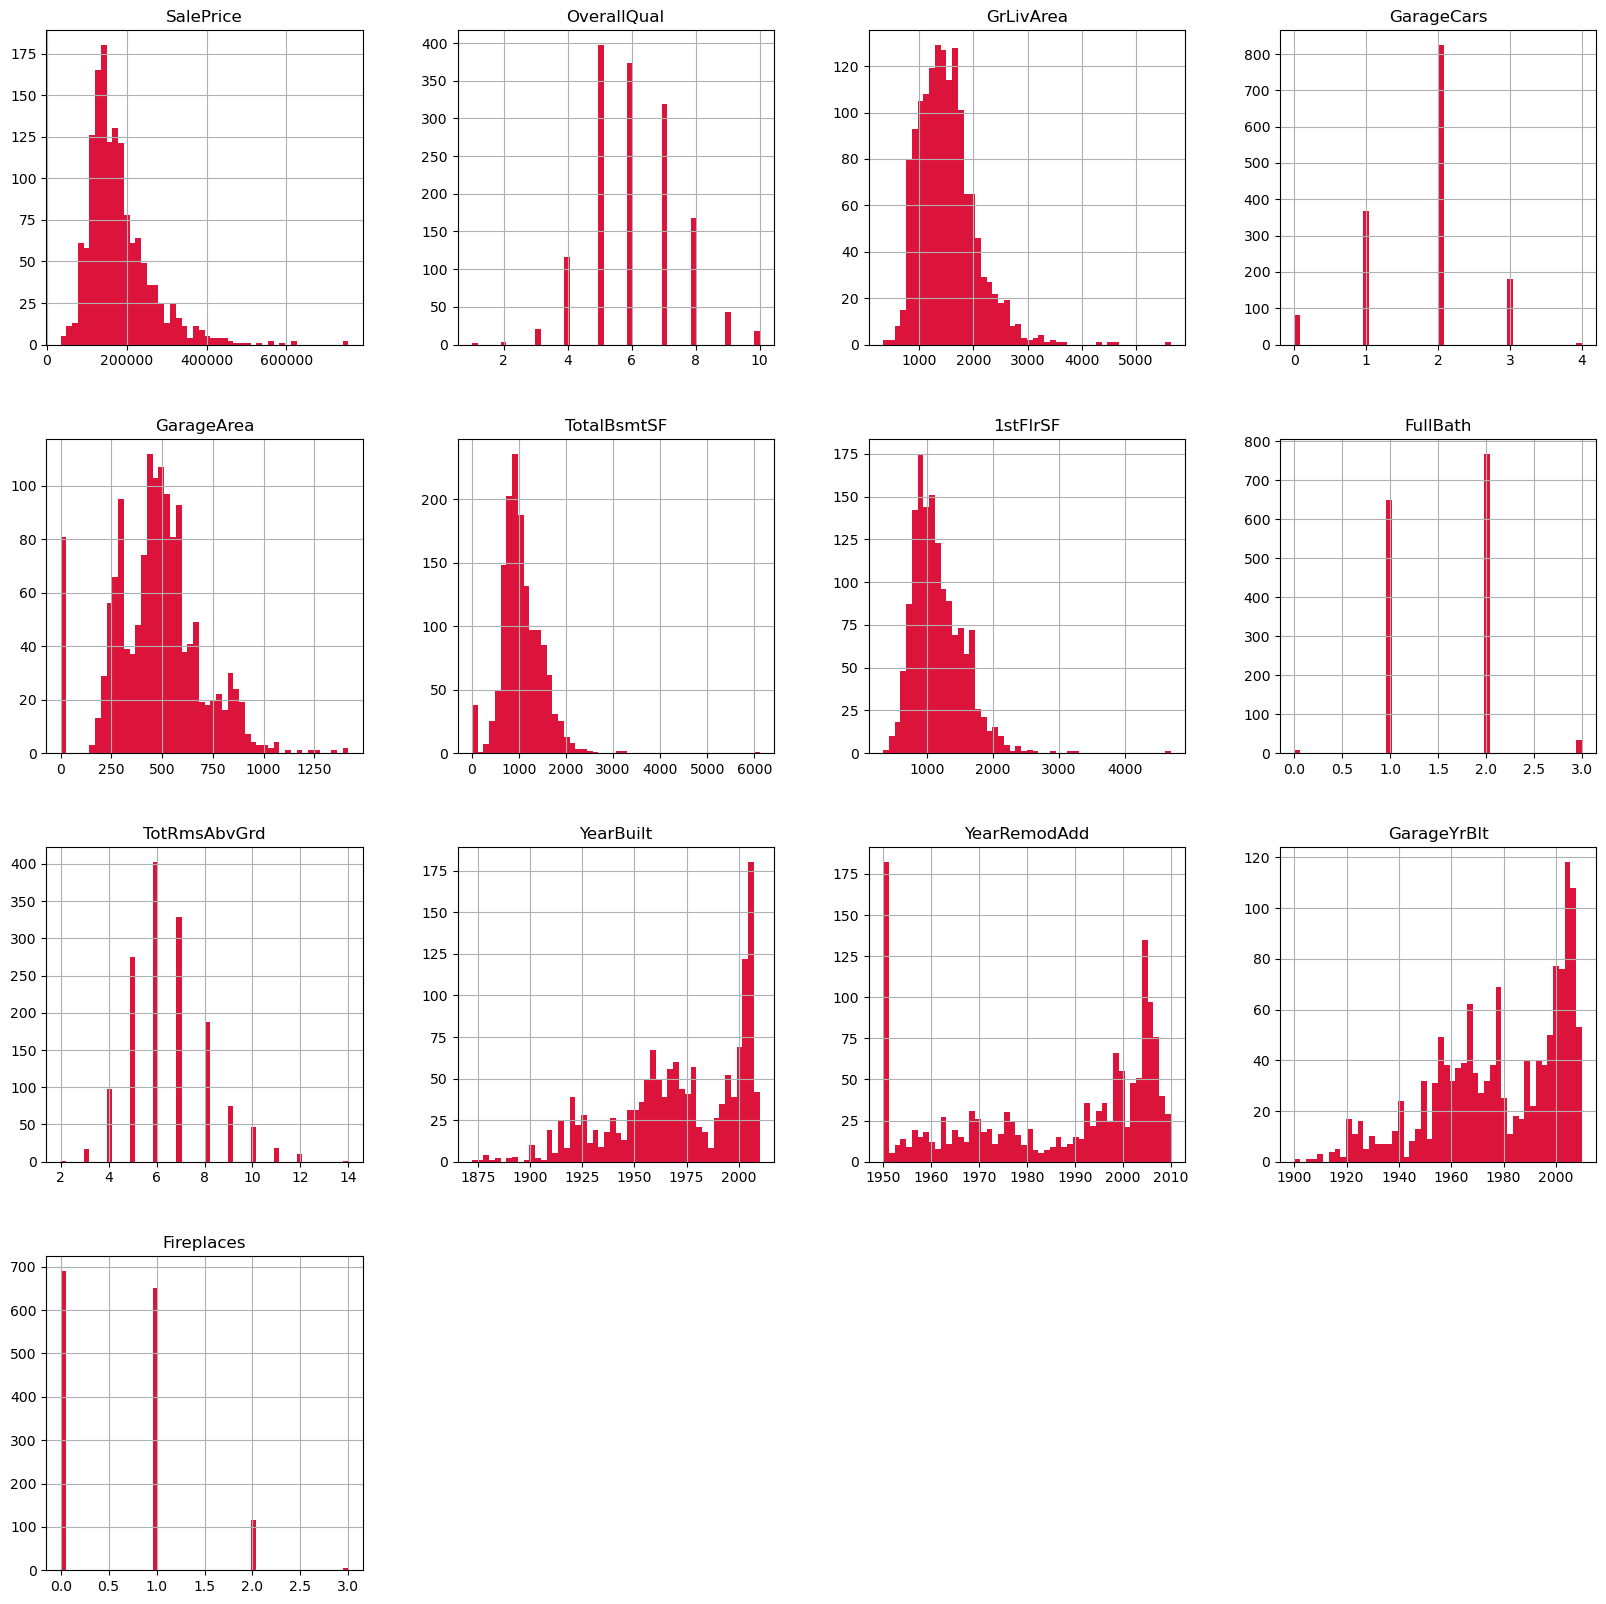


  Boxplots of some metric variables of the dataframe: 



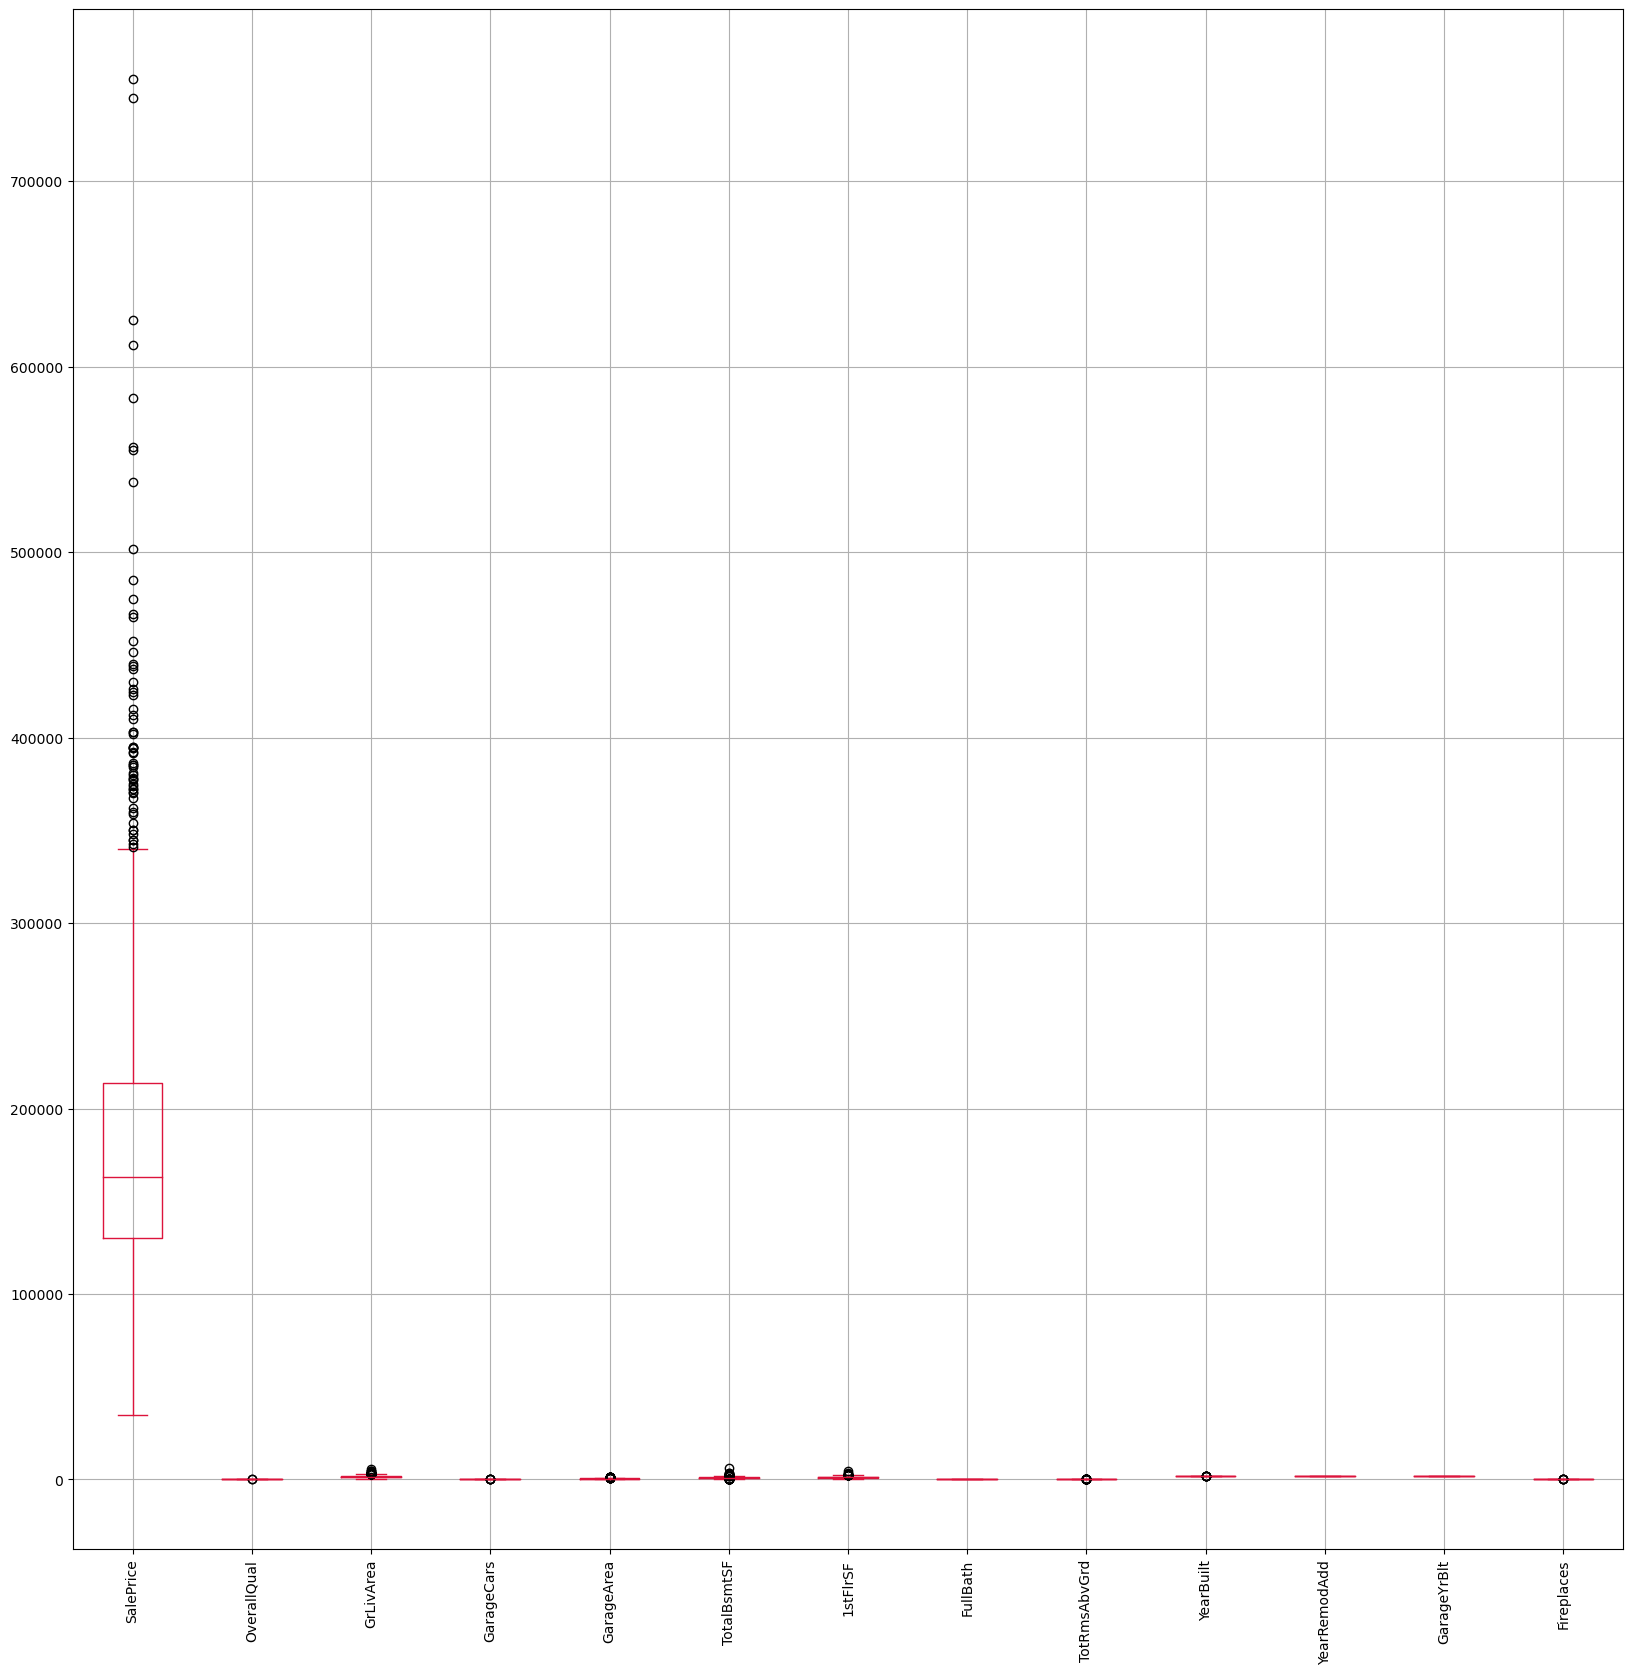


  Spearman Correlation Coefficient of some metric variables of the dataframe: 

              SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice      1.000000     0.809829   0.731310    0.690711    0.649379   
OverallQual    0.809829     1.000000   0.603262    0.608756    0.541552   
GrLivArea      0.731310     0.603262   1.000000    0.505094    0.468211   
GarageCars     0.690711     0.608756   0.505094    1.000000    0.853317   
GarageArea     0.649379     0.541552   0.468211    0.853317    1.000000   
TotalBsmtSF    0.602725     0.459915   0.371026    0.455508    0.486685   
1stFlrSF       0.575408     0.408730   0.494421    0.450580    0.489797   
FullBath       0.635957     0.576372   0.658419    0.518310    0.444459   
TotRmsAbvGrd   0.532586     0.427806   0.827874    0.386244    0.330549   
YearBuilt      0.652682     0.647392   0.288493    0.601519    0.528281   
YearRemodAdd   0.571159     0.557723   0.282400    0.456245    0.398267   
GarageYrBlt    0.59

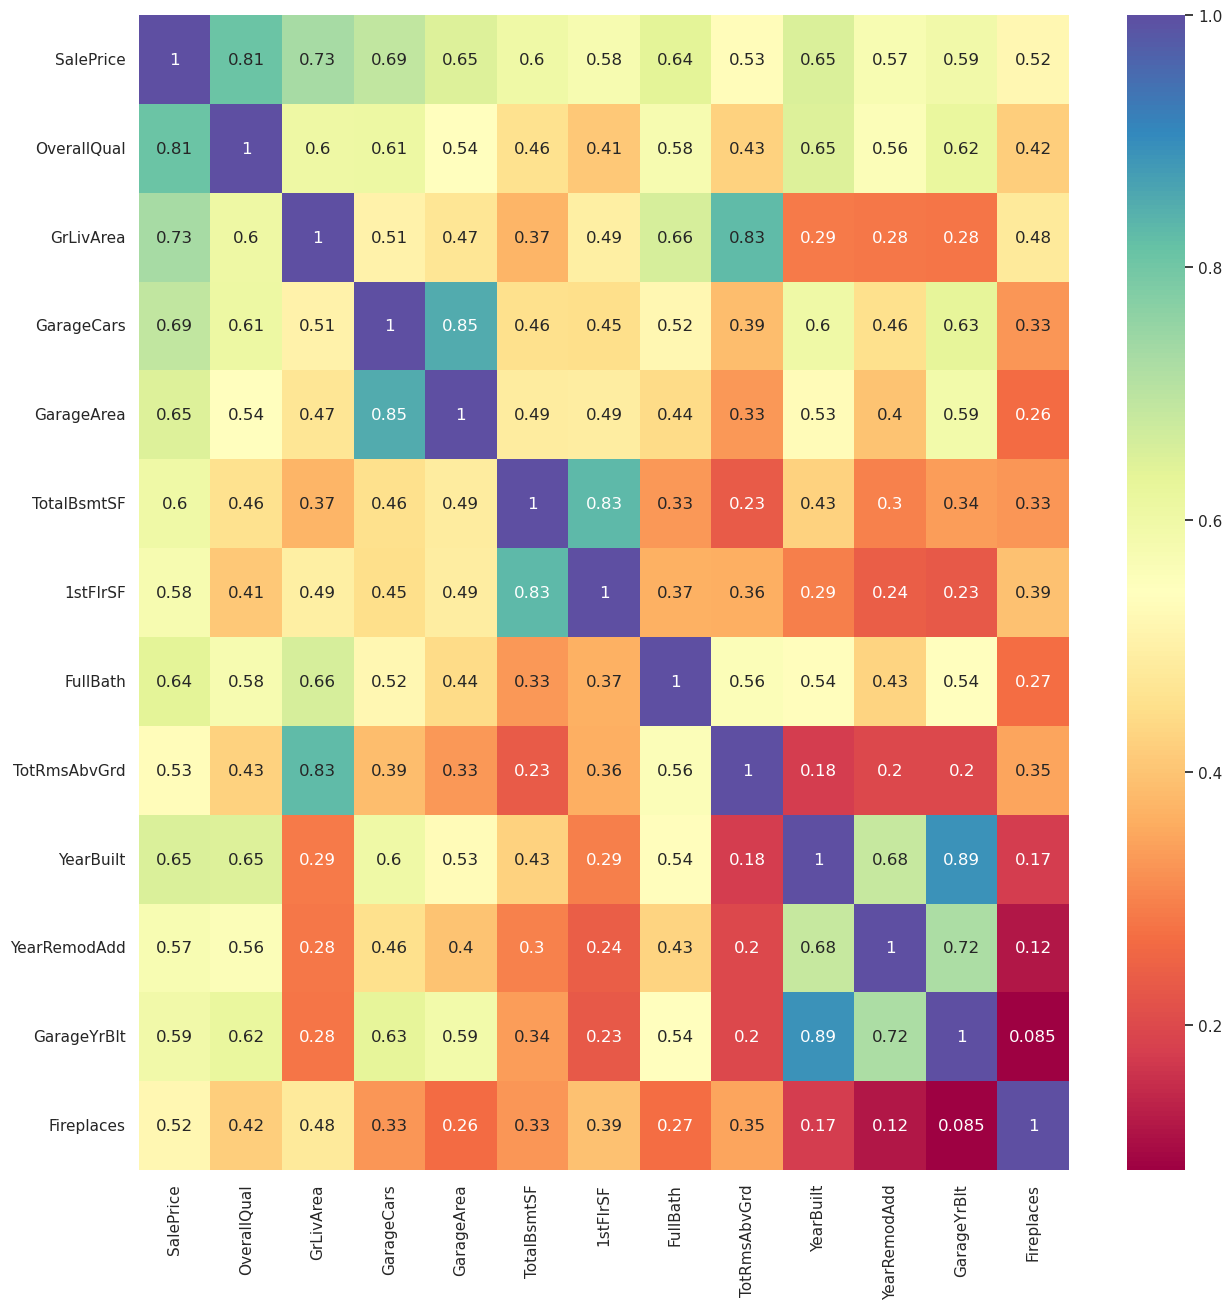

In [5]:
def EDA(training_dataX):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe - some metric variables:",'\033[0m', training_dataX.shape, "\n")
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe - some metric variables:",'\033[0m', "\n")
  print(training_dataX.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe - some metric variables:",'\033[0m', "\n")
  training_dataX.info()
 
  # Print the "number and percentage" of missing values per column" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column of some metric variables of the dataframe:", '\033[0m' + "\n")
  missing = training_dataX.isnull().sum()
  percent = missing / training_dataX.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

  # Print the "summary statistics" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Summary statistics of some metric variables of the dataframe:", '\033[0m' + "\n")
  print(training_dataX.describe())  
    
  # Plot "histograms" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m',"Histograms of some metric variables of the dataframe:", '\033[0m' + "\n")
  training_dataX.hist(bins= 50, figsize=(20,20),color= "Crimson")
  plt.show()  
    
  # Plot "boxplots" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m',"Boxplots of some metric variables of the dataframe:", '\033[0m' + "\n")
  training_dataX.boxplot(figsize=(20,20), rot=90, color= "Crimson")
  plt.show()
  
  # Print the "Spearman Correlation Coefficient" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Spearman Correlation Coefficient of some metric variables of the dataframe:", '\033[0m' + "\n")
  print(training_dataX.corr(method="spearman"))    
    
  # Plot "heatmap" of the "Spearman Correlation Coefficient" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Spearman Correlation matrix of some metric variables of the dataframe:", '\033[0m' + "\n")
  corr = training_dataX.corr(method="spearman")
  sns.set(rc={"figure.figsize":(15, 15)}) #width, height
  sns.heatmap(corr, annot = True, cmap="Spectral")
  plt.show()
    
# Call the function
EDA(training_dataX)

## __3.1. Analysis - Checking Collinearity__

1. The "Spearman Correlation Coefficient" (table and graph) shows us several cases of "Collinearity"; thereby, giving almost the same information both variables). 

> __<span style="color:#FF4500">Collinearity:  it happens when an "independent variable" is higly correlated with another "independent variable". It reduces the predicitive power of any "independet variable" by the extent to which is related to another "independet variable".</span>__

### __3.1.1. Conclusions__

1. The cases of collinearity are the followings: 

> Case N°1:"GaragaCars" vs "GarageArea" -"Pearson Correlation Coefficient" = 0.85 

> Case N°2:"TotalBsmtSF" vs "1stFlrSF" -"Pearson Correlation Coefficient" = 0.83 

> Case N°3:"TotRmsAbvGrd" vs "GrLivArea" -"Pearson Correlation Coefficient" = 0.83 

> Case N°4:"YearBuilt" vs "GarageYrBlt" -"Pearson Correlation Coefficient" = 0.89 

2. Based on the previous point, ***we only require one of the "independent variables" in each collinear case (i.e. we can keep the "independent variable" with the strongest correlation to the "dependent variable")***. Those "independents metric variables" that we are going to keep are the followings

> Case N°1:"GaragaCars"

> Case N°2:"TotalBsmtSF"

> Case N°3:"GrLivArea" 

> Case N°4:"YearBuilt"

3. Based on the previous point, ***the other "independent variable" of every case will be dropped***. Consequently, the linear model is going to use only 8 independet metric variables. These are the followings:

> OverallQual        

> GarageCars      

> TotalBsmtSF    

> FullBath      

> GrLivArea 

> YearBuilt     

> YearRemodAdd    
    
> Fireplaces 

# __4. Part N°1 of Data Visualization (Scatterplot Matrix) - Training Dataset (some Independent Features - Metric Variables)__


  Scatterplot matrix of some metric variables of the dataframe: 



array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='FullBath', ylabel='SalePrice'>,
        <Axes: xlabel='YearBuilt', ylabel='SalePrice'>,
        <Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>,
        <Axes: xlabel='Fireplaces', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='YearRemodAdd', ylabel='OverallQual'>,
        <Axes: x

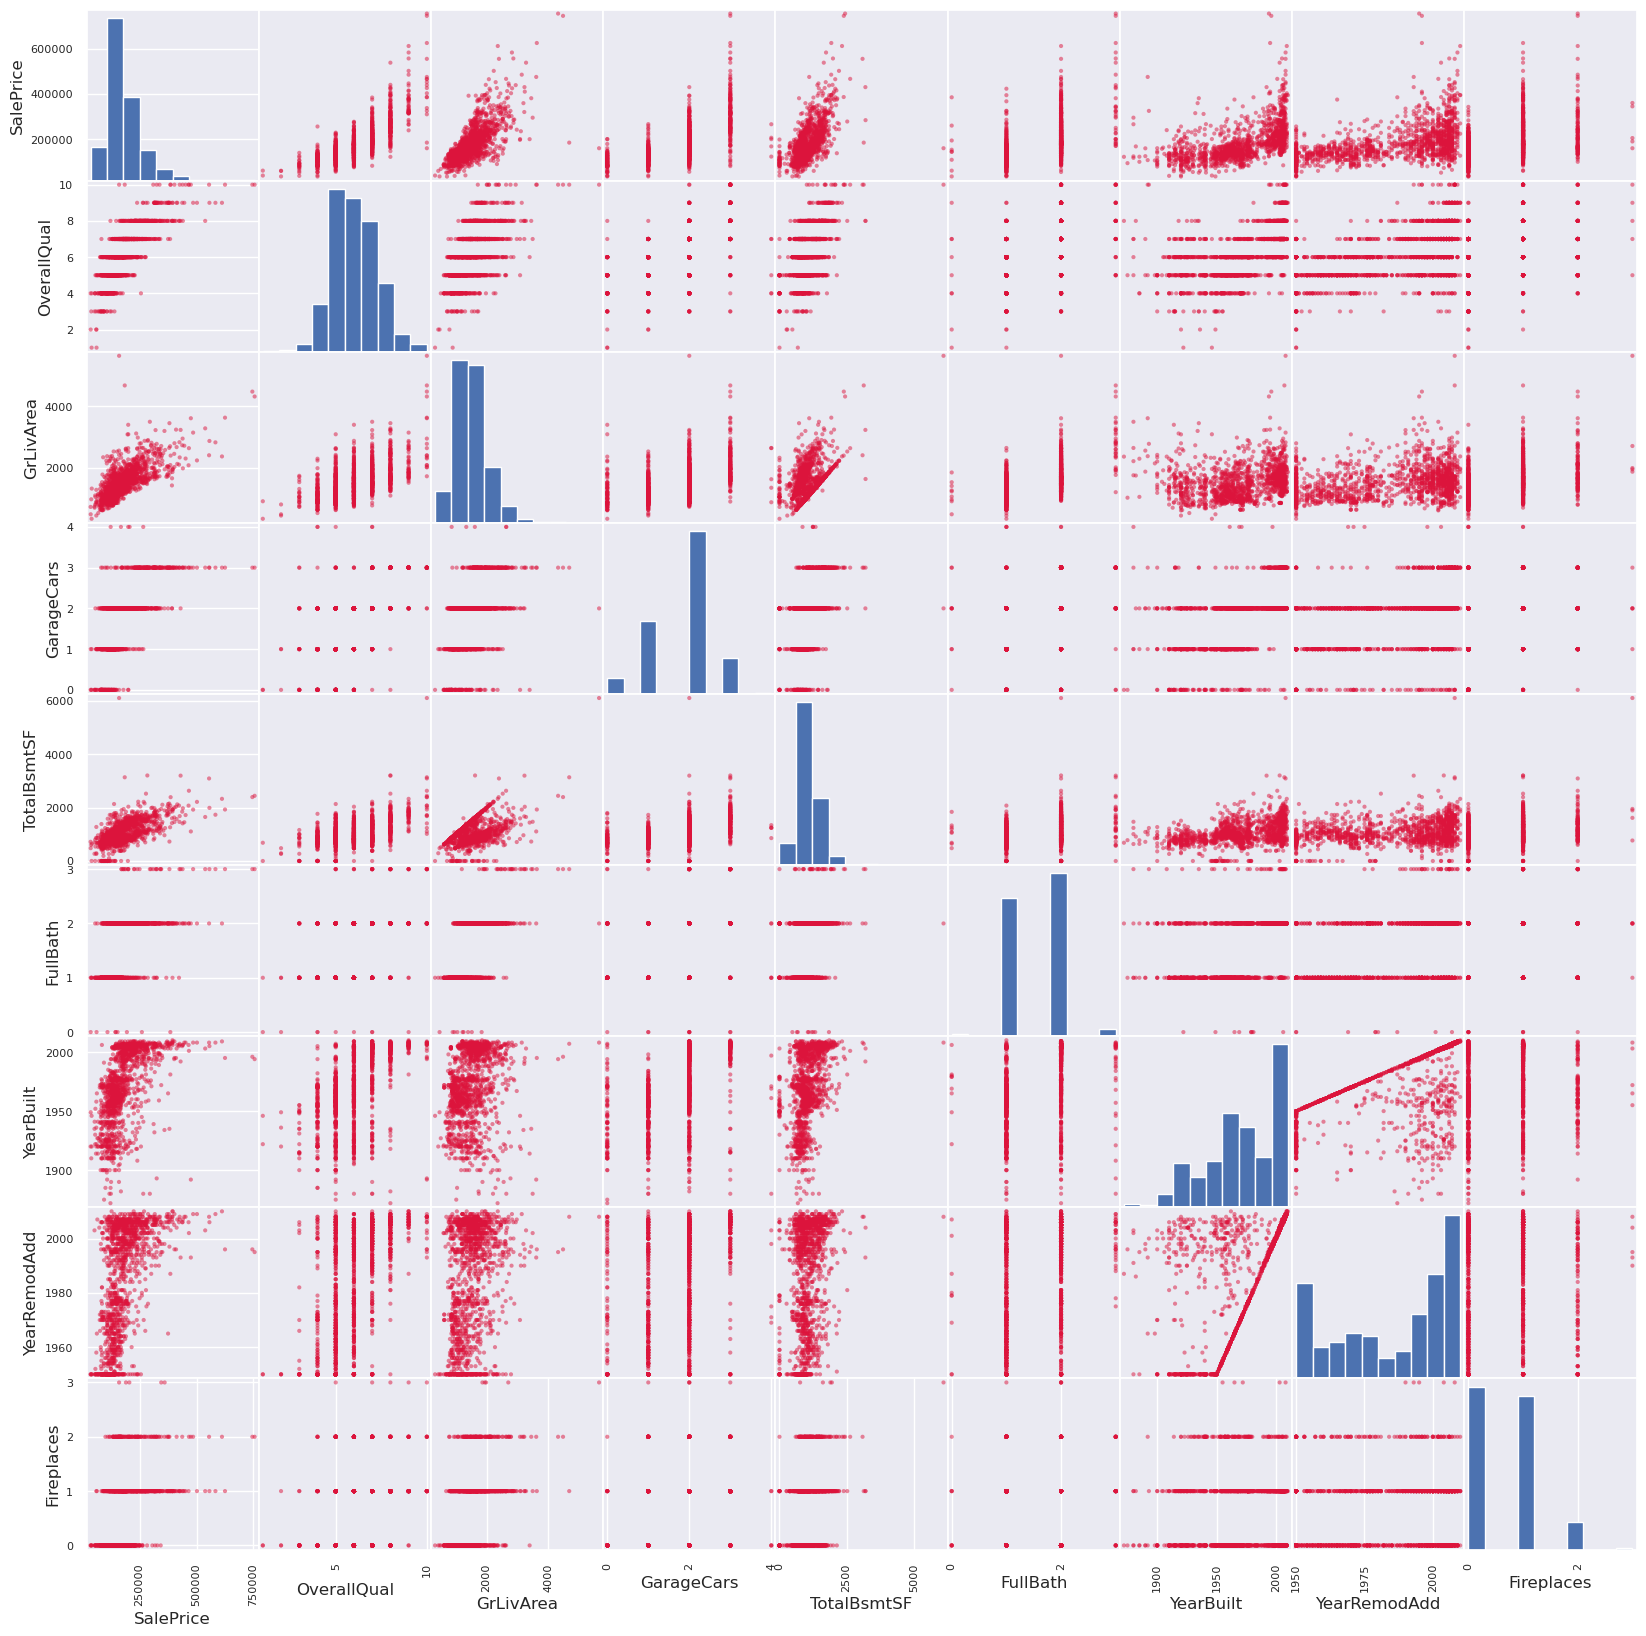

In [6]:
#First of all, this analysis approach is Bivariate.

#Plotting a "scatterplot" of some metric variables with high correlation according to the "Spearman Correlation Coefficient"
    #Defining the dataframe (based on "Section 3.1.1. Conclusions")
    
print("\n" +'\033[1m','\033[94m', "Scatterplot matrix of some metric variables of the dataframe:", '\033[0m' + "\n")
training_dataX2 = training_dataX[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd", "Fireplaces"]]
scatter_matrix (training_dataX2, figsize = (20,20),color= "Crimson")

# __4. Part N°2 of Data Visualization (Skewness and Kurtosis) - Training Dataset (some Independent Features - Metric Variables)__

In [7]:
#First of all, this analysis approach is Univariate.

#Checking the "Skewness" and "Kurtosis" of the dependent metric variable and most important independent...
#...metric variables ("SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath",...
#..."YearBuilt", "YearRemodAdd", "Fireplaces") according to "Section 3.1.1. Conclusions".

#We are going to check the "Skewness" and "Kurtosis" because the previous "Scatterplot Matrix" of section...
#..."Part N°1 of Data Visualization (Scatterplot Matrix) - Training Dataset (some Independent Features...
#...- Metric Variables)" shows us histograms of some metric variable (Uniariate Analysis) with...
#...apparently a non-normal shape.
        #It is important to remark that the Kurtosis is obtained using Fisher’s definition of...
        #...kurtosis (kurtosis of normal == 0.0).
        #We are rounding the values up to 2 decimals.
        
#We are going to get as a result that our assumption that histograms of every metric variable have...
#...a non-normal shape is in fact true.    

    #In othe words, none of the "probability plot" of the dependent and independent variables follow...
    #...the shape of a "Normal probability plot"

#Dependent metric variable (Skewness and Kurtosis)
print("\n" +'\033[1m','\033[94m', "Dependent metric variable (Skewness and Kurtosis):", '\033[0m' + "\n")
print("Skewness:", round(training_dataX2['SalePrice'].skew(),2))
print("Kurtosis:", round(training_dataX2['SalePrice'].kurt(),2))

#ndependent metric variable (Skewness)
print("\n" +'\033[1m','\033[94m', "Independent metric variables (Skewness):", '\033[0m' + "\n")
print(round(training_dataX2[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd", "Fireplaces"]].skew(),2))

#ndependent metric variable (Kurtosis)
print("\n" +'\033[1m','\033[94m', "Independent metric variables (Kurtosis):", '\033[0m' + "\n")
print(round(training_dataX2[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd", "Fireplaces"]].kurt(),2))


  Dependent metric variable (Skewness and Kurtosis): 

Skewness: 1.88
Kurtosis: 6.54

  Independent metric variables (Skewness): 

OverallQual     0.22
GrLivArea       1.37
GarageCars     -0.34
TotalBsmtSF     1.52
FullBath        0.04
YearBuilt      -0.61
YearRemodAdd   -0.50
Fireplaces      0.65
dtype: float64

  Independent metric variables (Kurtosis): 

OverallQual      0.10
GrLivArea        4.90
GarageCars       0.22
TotalBsmtSF     13.25
FullBath        -0.86
YearBuilt       -0.44
YearRemodAdd    -1.27
Fireplaces      -0.22
dtype: float64


# __4. Part N°3 of Data Visualization (Normal Probability Plot) - Training Dataset (some Independent Features - Metric Variables)__


  Normal Probability Plots: 



Text(0.5, 1.0, 'Normal Probability Plot: Fireplaces')

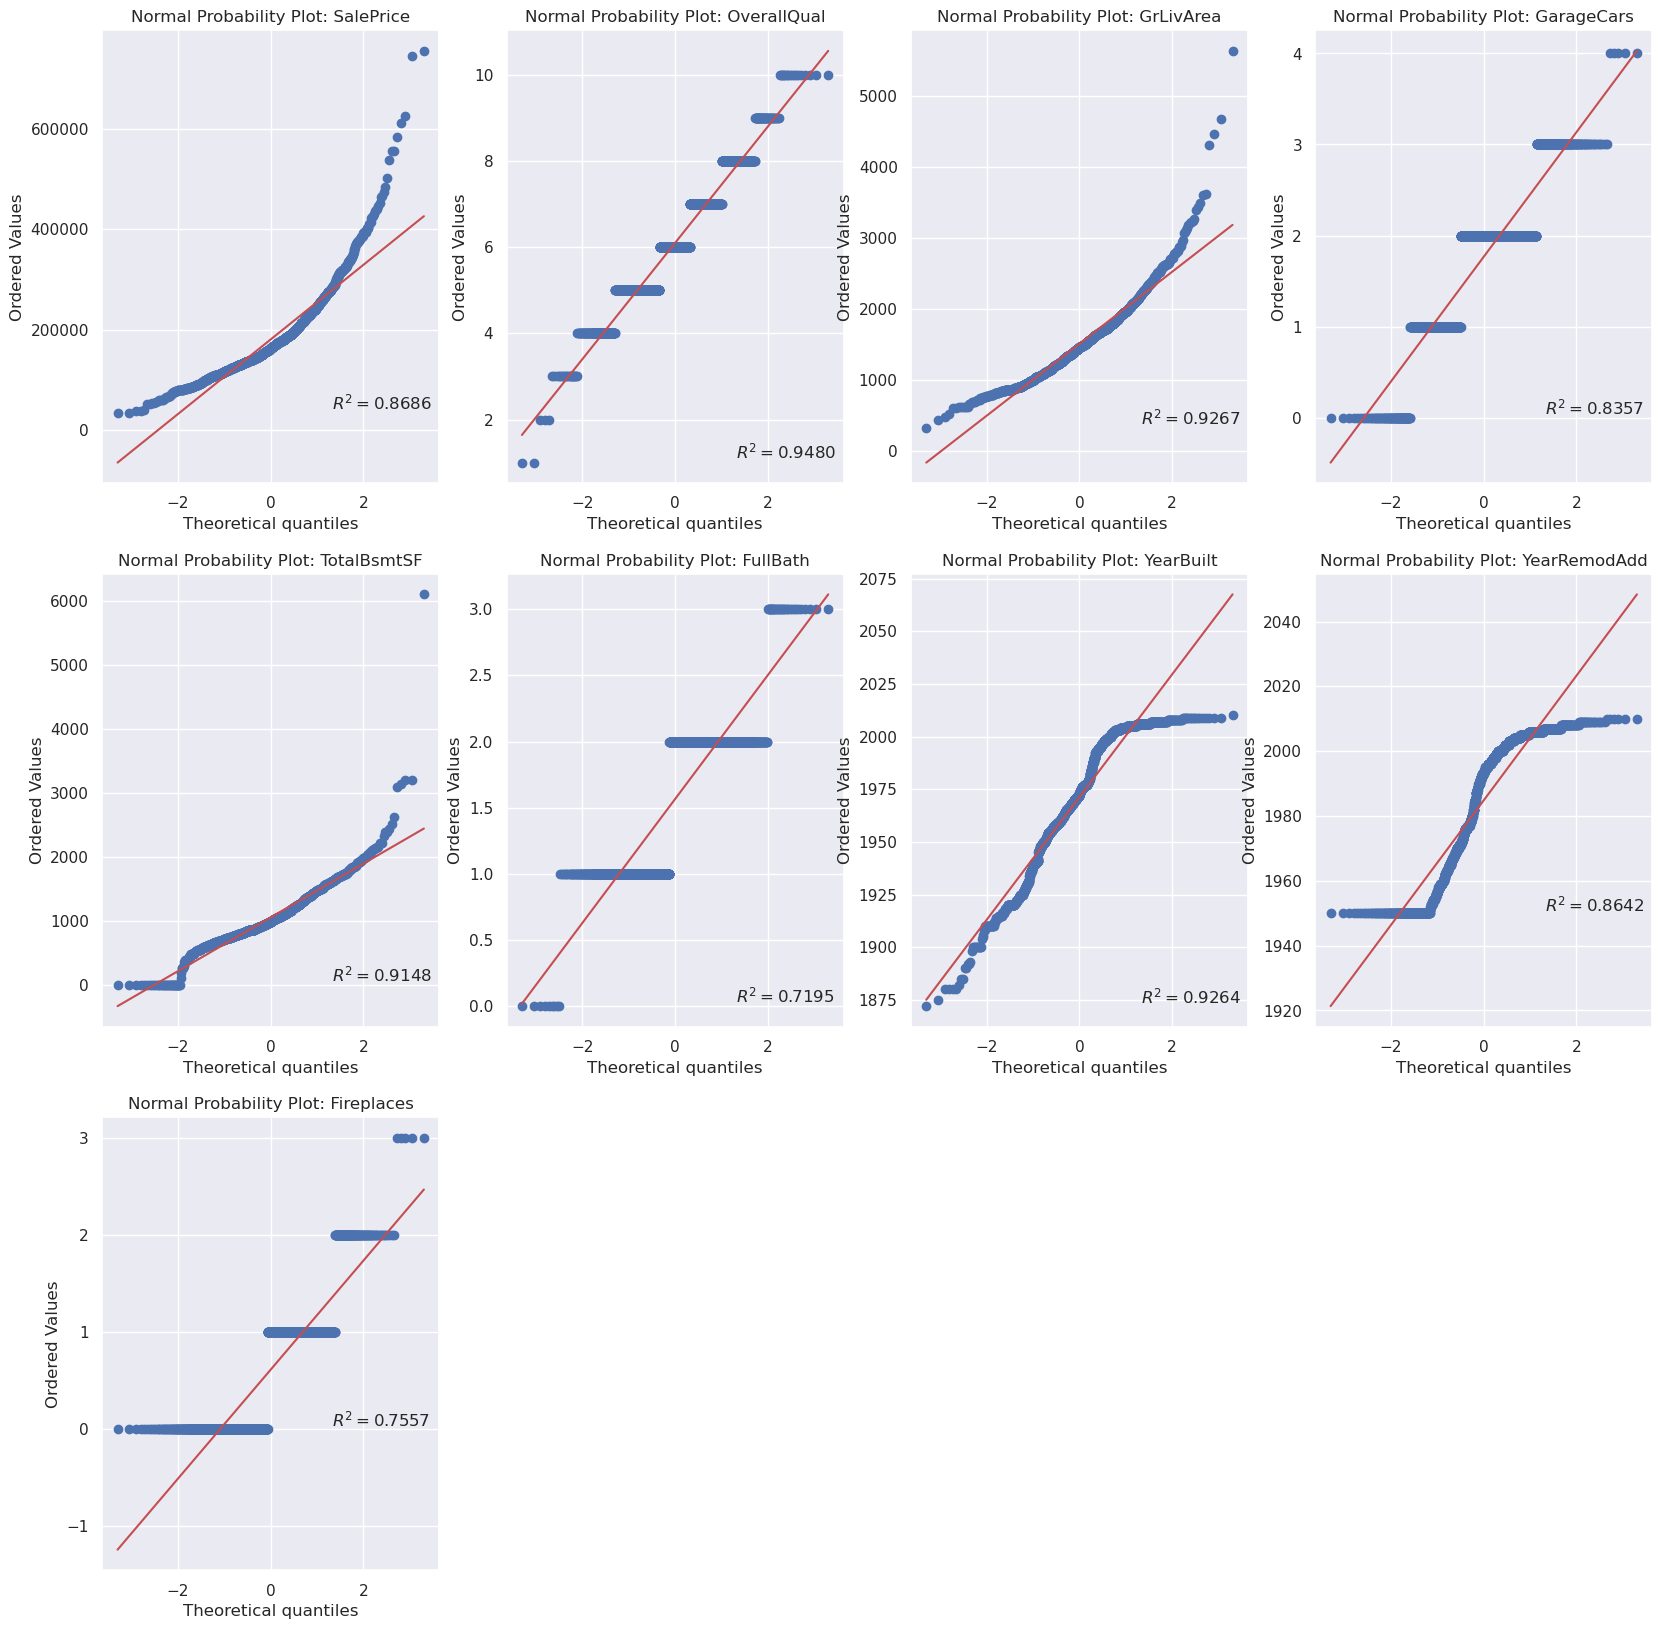

In [8]:
#First of all, this analysis approach is Univariate.

#Checking the "Normal Probability Plot" of the dependent metric variable and most important independent...
#...metric variables ("SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath",...
#..."YearBuilt", "YearRemodAdd", "Fireplaces") according to "Section 3.1.1. Conclusions".

#We are going to check the "Normal Probability Plot" because the previous "Scatterplot Matrix" of section...
#..."Part N°1 of Data Visualization (Scatterplot Matrix) - Training Dataset (some Independent Features...
#...- Metric Variables)" shows us histograms of some metric variable (Uniariate Analysis) with...
#...apparently a non-normal shape.

#"Normal Probability Plot" {stats.probplot()}:
    #It calculates "quantiles" for a probability plot, and optionally show the plot of sample data...
    #...against the "quantiles" of a specified distribution (the Normal Distribution by default). 
    
    #It optionally calculates a best-fit line for the data and plots the results.
    
        #Quantiles: are values that split sorted data or a probability distribution into equal parts...
        #...In general terms, a "q-quantile" divides sorted data into "q parts".
    
#Syntax
    #scipy.stats.probplot(x, dist='norm', fit=True, plot=None, rvalue=False)
    
    #Parameters
        #x: array_like
            #Sample/response data from which probplot creates the plot.
        #dist (optional):str or stats.distributions instance.
            #Distribution name. The default is ‘norm’ for a normal probability plot. 
        #fit (optional): bool
            #Fit a least-squares regression (best-fit) line to the sample data if True (default).
        #plot (optional): object
            #If given, plots the quantiles. If given and fit is True, also plots the least squares...
            #...fit. Default is None, which means that no plot is created.
        #rvalue (optional): bool
            #If plot is provided and fit is True, setting rvalue to True includes the coefficient...
            #...of determination on the plot. Default is False.
        
#The purpose of “fig” and “ax” in the code:
    #It is to create a figure and an axes object for plotting the data. 
    
    #Figure: is the top-level container for all the plot elements, such as titles, legends, axes, etc...
    #...It is like a blank canvas.
    
        #plt.figure(): 
            #Function to create a new figure object with a specified size (20 by 20 inches)
    
    #Axes: is a specific region of the figure where the data is plotted, along with the x-axis, y-axis,...
    #...labels, ticks, etc. You can think of a axes as a painting on that canvas (i.e. the "figure").

        #fig.add_subplot():
            #Method to add a new axes object to the figure. 
            #The argument 341 means:
                #We have a grid of 3 rows, 4 columns (i.e. we have one (1) "figure" that have...
                #...twelve (12) "axes" or also called by me "blank spaces".
                
                #In each one (1) of these "axes", I am going to put one (1) plot. Considering that I ...
                #...have nine (9) plots, then I am going to use only nine (9) of the twelve (12)..
                #...available axes".
                
                #The argument (341) works like coordinate tu put each plot. For instance, the...
                #...argument(341) means that want a single subplot located in the 1st position of... 
                #...the in grid of 3 rows and 4 columns the figure.
                
                #Taking into account that I only have in the grid 4 columns, in the first row...
                #...we are going to have 4 plots, in the second row we are going to have 4 plots...
                #...and in the third row we are going to have only 1 plot, making a total of...
                #...9 plots.

#We are going to get as a result that our assumption that histograms of every metric variable have...
#...a non-normal shape is in fact true.

    #In othe words, none of the "probability plot" of the dependent and independent variables follow...
    #...the shape of a "Normal probability plot"

# Create a normal probability plot with a best-fit line and r-value
print("\n" +'\033[1m','\033[94m', "Normal Probability Plots:", '\033[0m' + "\n")
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(341)
npp1 = stats.probplot(training_dataX2['SalePrice'], plot=ax1, fit=True, rvalue=True)
plt.title("Normal Probability Plot: SalePrice")

ax2 = fig.add_subplot(342)
npp2 = stats.probplot(training_dataX2['OverallQual'], plot=ax2, fit=True, rvalue=True)
plt.title("Normal Probability Plot: OverallQual")

ax3 = fig.add_subplot(343)
npp3 = stats.probplot(training_dataX2['GrLivArea'], plot=ax3, fit=True, rvalue=True)
plt.title("Normal Probability Plot: GrLivArea")

ax4 = fig.add_subplot(344)
npp4 = stats.probplot(training_dataX2['GarageCars'], plot=ax4, fit=True, rvalue=True)
plt.title("Normal Probability Plot: GarageCars")

ax5 = fig.add_subplot(345)
npp5 = stats.probplot(training_dataX2['TotalBsmtSF'], plot=ax5, fit=True, rvalue=True)
plt.title("Normal Probability Plot: TotalBsmtSF")

ax6 = fig.add_subplot(346)
npp6 = stats.probplot(training_dataX2['FullBath'], plot=ax6, fit=True, rvalue=True)
plt.title("Normal Probability Plot: FullBath")

ax7 = fig.add_subplot(347)
npp7 = stats.probplot(training_dataX2['YearBuilt'], plot=ax7, fit=True, rvalue=True)
plt.title("Normal Probability Plot: YearBuilt")

ax8 = fig.add_subplot(348)
npp8 = stats.probplot(training_dataX2['YearRemodAdd'], plot=ax8, fit=True, rvalue=True)
plt.title("Normal Probability Plot: YearRemodAdd")

ax9 = fig.add_subplot(349)
npp9 = stats.probplot(training_dataX2['Fireplaces'], plot=ax9, fit=True, rvalue=True)
plt.title("Normal Probability Plot: Fireplaces")


## __4.1. Analysis - Checking Null values and Missing Data__

1. The "Number and percentage of missing values per column of some metric variables of the dataframe" shows us that it will be necessary to apply ***Imputer Strategy (i.e. apply some Data transformation in a future Pipeline called  "SimpleImputer")*** in some numerical attributes. 

> __<span style="color:#FF4500">Imputer Strategy (Univariate Method): it is helpful for dealing with "null values / missing" data in metric variables. In other words, we can replace the "null values / missing data" of a specific variable with an estimation based on the valid data values (for instance the "mean" or "median" value) of that specific variable.</span>__

2. It is important to consider the following __<span style="color:#FF4500">impacts when we are dealing with "missing data or null values"</span>__:

> There will be a reduction of the sample size available; therefore, to solve this we should drop some observations (missing data or null values) or drop an entire variable. 

> It could lead us to erroneous or biased results (for instance the computation of the "mean of variable" with and without the quantity of observations considered "missing data or null values"); therefore, to solve this we should detect and drop some observations (missing data or null values) or drop an entire variable. 

3. Important __<span style="color:#FF4500">considerations about null values / missing data are described in the following table</span>__:

|Missing data Percentage|Comment|
|--|--|
|<10%     |The missing data in the variable can generally be ignored, except when it happens in a non-ramdon way. In addition, below 10% it is discretionary the use of almost any "Imputation Methods". Finally, The "non-null values" in the variable can be used for any analysis if the decision to no apply an "Imputation Method" to substitute the missing data is taken.|
|||
|>15%     |The variable could be deleted. Before the deletion of the variable, we need to check that there is at least other variable (probably "collinear") able to represent the variable that we are going to delete. We should use an "Imputation Methods"; however, the type of "Imputation Method" will depend of the missing data percentage.|

### __4.1.1. Conclusions__

1. The "independent metric variables" that we are going to use for the model (i.e., "OverallQual, GarageCars, TotalBsmtSF, FullBath, GrLivArea, YearBuilt, YearRemodAdd, Fireplaces") do not have "null values / missing data" according to the results of Section "3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)", to specific, the sub-sections:

> "Information of the dataframe - some metric variables"

> "Number and percentage of missing values per column of some metric variables of the dataframe"

2. The best we can do to address this issue is to be prepare in case we decide to change the set of independent metric variables; therefore, we are going to use the ***Imputer Strategy (i.e. apply some Data transformation in a future Pipeline called  "SimpleImputer")***. Maybe, those new independent metric variables to use have some null value / missing data. The ***type of imputation that we are going to apply works theoretically*** in the following way:

|Imputation Method|Advantage|Disadvantage|Use|
|--|--|--|--|
|Imputation by Calculating Replacement Values (Mean or Median Substitution)|Easy to apply|Reduce variance of the distribution / Distorts distribution of the data / Depressess observed correlations|Low levels of missing data / Strong relationship among variables.

## __4.2. Analysis - Checking Outliers__

1. __<span style="color:#FF4500">Outlier: it could be an unusual observation (high or low) on a variable or the result of a unique combination of several variables' values that make or produce a unusual value.</span>__

2. It is important to consider the following __<span style="color:#FF4500">impacts when we are dealing with "outliers"</span>__:

> Is it the outlier representative of the population or a specific sector of the population? And based on this analysis, we should decide if drop or retain the outlier.

> Could the outlier lead us to erroneous or biased results in the computation of parameters such as the "mean of variable"; and based on this analysis, we should decide if drop or retain the outlier.

3. Important __<span style="color:#FF4500">considerations about outliers are described in the following lines</span>__:

> Detect Outliers (Univariate Method):

|Number of observations in the sample|Comment|
|--|--|
|<80|It is considered a small smaple. In this case if (standard deviation > +-2.5) after the the process of "Standardization" (i.e., the dataset will be transformed to have a "mean = 0" and "standard deviation = 1"), then we are dealing with observations considered outtliers.|
|||
|>80|It is considered a large smaple. In this case if (standard deviation > +-4.0) after the the process of "Standardization" (i.e., the dataset will be transformed to have a "mean = 0" and "standard deviation = 1"), then we are dealing with observations considered outtliers.|

> Detect Outliers (Bivariate Method): It is called "Bivariate Normal Distribution Confidence Interval (90% - 95% level)". This method will show a ellipse superimposed over a bivariate scatterplot. The main disavantage of this method is that it generates a lot of graphs; therefore,  we should carefully select the variables that we want/need to analyze with this methodology.

### __4.2.1. Checking the BoxPlots__

1. __<span style="color:#FF4500">Boxplot: it represents the distribution of a variable.</span>__

#### __4.2.1.1. Conclusions__

1. Taking into account that my ***dependent and independent variables have more than 80 observations (to be precise, 1460 observations), we can establish that we are dealing with a "large sample"***. Consequently, (standard deviation > +-4.0) after the the process of "Standardization" are considered outtliers.

2. The position of the "whiskers" in the dependent variable "SalePrice" show us a great distance to the smallest and the largest observations that are less that one quartile range from the box.

3. Based on the boxplots of the section "3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)" the position of the "median value" in the dependent variable "SalePrice" apparently is a little bit of skewness. A clear and complementary proof of the previous statement is shown in the section "4. Part N°2 of Data Visualization (Skewness and Kurtosis) - Training Dataset (some Independent Features - Metric Variables)". ALthough this comment also apply for the independent variables.

4. Based on the data (before the transformation through "Standardization or Normalization") there are "outliers" in the dependent and independent variables.

5. It will be necessary to apply ***Feature Scaling (i.e. apply some Data transformation in a future Pipeline such a "Standardization or Normalization {also called "Min-Max Scaling}")*** in some numerical attributes. ***Then, we could consider if drop or retain an outlier***. based on the sections:

> The "Boxplots of some metric variables of the dataframe" of Section "3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)".

> The "Scatterplot matrix of some metric variables of the dataframe" of Section "4. Part N°1 of Data Visualization (Scatterplot Matrix) - Training Dataset (some Independent Features - Metric Variables)".

> The concept of "Kurtosis" from "4. Part N°2 of Data Visualization (Skewness and Kurtosis) - Training Dataset (some Independent Features - Metric Variables)".

> Transforming the variable could change the interpretability of the variable.

## __4.3. Analysis - Checking Assumptions of Multivariate Analysis (Assumption N°2: Normality)__

1. __<span style="color:#FF4500">Glossary (Important Concepts).</span>__ 

> Normality: degree to which a "data distribution" corresponds to a "Normal distribution"

> Skewness: measure of the symmetry of a "data distribution" (mostly compared to a "Normal distribution"). The values of the measures range from -1 (Negative Skewness = tail off to the left) to +1 (Positive Skewness = tail off to the right).

> Kurtosis: measure of peakedness or flatness of a "data distribution" (mostly compared to a "Normal distribution"). "Negative Kurtosis value" = "flat distribution" and "Positive Kurtosis value" = "peak distribution". It describes how heavy-tailed or light-tailed a distribution is. A higher kurtosis means more values in the tails, while a lower kurtosis means fewer values in the tails.  A higher kurtosis means that the distribution has more values in the tails, indicating more outliers or extreme values. A lower kurtosis means that the distribution has fewer values in the tails, indicating less variability or dispersion.

> Robustness: ability of a model or statistical technique to perform relatively well even when some statistical assumptions have been violated.

> Normal Probability Plot: graphical comparison of "data distribution" to a "Normal distribution".In the Normal Probability Plot, the "Normal Distribution" is represented by a straight line angled at 45 degrees. The "data distribution" is graphed against this line, which make very easy to spot if we are dealing or not with a "Normal Distribution".

2. __<span style="color:#FF4500">Key ideas of "Normality":</span>__ 

> It is the most fundamental assumption. In fact, if the condition of "Normality" is not met we are going to be in troubles computing statistical parameters such as "F Statistics" and "t-statistics".

> It refers to the "shape" of the data distribution as a way to spot non-normality (i.e., it is a Univariate Analysis).

> There is the concept of "Multivariate Normality" (complex to check!) and "Univariate Normality" (easy to check!).

3. __<span style="color:#FF4500">The severity of "Non-normality" is based on:</span>__

> The shape of the data sample distribution: the analysis of the shape could be subjective and it is done using the parameters of "Kurtosis" and "Skewness". The values of "Kurtosis" and "Skewness" depend on the type of data distribution as we can see in the following table:

|Normal Distribution|Kurtosis Value|Skewness Value|
|--|--|--|
|Yes|3 (or 0 if Fisher’s definition is used {which is the case when we use the Pandas command "kurt()"} ).|0|
|No|+ or -|+ or -|

> The size of the data sample distribution: a large size sample tends to diminish the detrimental effects of non-normality and increase the statistical power.

|Sample Size|Impact of "non-normality" on Normality Analysis|
|--|--|
|<50 observations|Substantial Impact|
|>200 observations|Negligible Impact|

4. Methods __<span style="color:#FF4500">to detect non-normality</span>__:

> Method N°1 (Univariate Method): Using "Histograms" of the data that is going to be analyzed and then estimating thie "skewness and kurtosis".

> Method N°2 (Univariate Method): Using "Normal Probability Plot" of the data that is going to be analyzed versus "Normal Distribution".

5. The main method __<span style="color:#FF4500">to solve non-normality</span>__ is transforming the data. In fact, solving issues with this "assumption", allow us to solve at the same time issues with the following assumption (i.e. Assumption N°3: Heterosdasticity).

### __4.3.1. Conclusions__

1. Taking into account that my ***dependent and independent variables have more than 200 observations (to be precise, 1460 observations), we can establish that the "Impact of non-normality on Normality Analysis" is "Negligible"**. However, it is still convenient to apply "data transformation" as method to deal with maybe Assumption N°3: Heterosdasticity" (i.e. our problem is not going to be related with the size of data but with its "variance"{as we are going to explain in the further section "4.4. Analysis - Checking Assumptions of Multivariate Analysis (Assumption N°3: Homoscedasticity)"}).

2. ***Transforming the data*** of one or both variables (dependent variable and independent variable) to improve its representation, ***applying mathematical functions such as logarithm, exponential, cubic,...***. It will be necessary to apply ***Attribute Transformation in a future Pipeline)*** in some numerical attributes based on the sections:

> "3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)", to be specific the Subsection "Histograms of some metric variables of the dataframe".

> "4. Part N°1 of Data Visualization (Scatterplot Matrix) - Training Dataset (some Independent Features - Metric Variables)".

> "4. Part N°2 of Data Visualization (Skewness and Kurtosis) - Training Dataset (some Independent Features - Metric Variables)".

> "4. Part N°3 of Data Visualization (Normal Probability Plot) - Training Dataset (some Independent Features - Metric Variables)".

3. Transforming the variable could change the interpretability of the variable.

## __4.4. Analysis - Checking Assumptions of Multivariate Analysis (Assumption N°3: Homoscedasticity)__

1. __<span style="color:#FF4500">Homoscedasticity: this condition happens when the variance (i.e. the dispersion or spread) of the error terms ("e") is constant over a range of values of the independent variables. This assumption is crucial if we want to properly apply statistical techniques such as "Standard Error" and "Hypothesis Tests".</span>__

2. The check of the "Homoscedasticity assumption" is a Bivariate Analysis (dependent and independent variables). 

> The independent variables could be metric and non-metric (also called categorical variables).

3. If the assumption of "Homoscedasticity" is not accomplished, then we are dealing with "Heteroscedasticity" (i.e., in this condition the dependent variable is better at some leves of the independent variable than at others).

4. Method __<span style="color:#FF4500">to detect Heteroscedasticity</span>__:

> Method (Bivariate Method): Residual Plot ("Residuals" vs "Dependent Variable")

5. Sources __<span style="color:#FF4500">of Heteroscedasticity</span>__:

> Type of variable

> Skewness in data distribution (in dependent or/and independet variables)

### __4.4.1. Conclusions__

1. The main method __<span style="color:#FF4500">to solve Heteroscedasticity</span>__ is ***transforming the data** as it is recommended with "Assumption N°2: Normality". In essence, solving issues with Assumption N°2: Normality" can help us to address situations with "Assumption N°3: Homoscedasticity".

2. ***Transforming the data*** of one or both variables (dependent variable and independent variable) to improve its representation, ***applying mathematical functions such as logarithm, exponential, cubic,...***. It will be necessary to apply ***Attribute Transformation in a future Pipeline)*** in some numerical attributes.

# __5. Separating the Data - Training Dataset__

In [9]:
#Making a copy of the original training dataset.
training_data2 = training_data.copy()

#We are going to "tranform" (using the Numpy "log" function {Natural Logarithm}) all of the metric...
#...variables from section "5. Separating the Data - Training Dataset" to achieve linearity, 
#...except for the features "TotalBsmtSF" and "GrLivArea".

#Metric Features
    #Making a copy of the training dataset generated in the section "4. Part N°1 of Data Visualization (Scatterplot Matrix) - Training Dataset (some Independent Features - Metric Variables)"
training_data_metric = training_dataX2.copy()

    #Separating some "features" from the "labels" (also called "target value") of the training dataset
        #Because we do not want to apply the same transformations to the "target values" and "features"
        #Dataframe with only some "features" of the training dataset
training_data_metric = training_data_metric.drop("SalePrice", axis=1)
    #Extracting only the headers of some metric features from the original training dataset.
training_data_metric_header = training_data_metric.columns.values.tolist()

#Nonmetric Features
    #Extracting the nonmetric features from the original training dataset.
training_data_nonmetric = training_data.select_dtypes(include=["object"])
    #Extracting only the headers of the nonmetric features from the original training dataset.
training_data_nonmetric_header = training_data_nonmetric.columns.values.tolist()

# __6. Transformation Pipelines__

## __6.1. Pipeline - Part 1: Data Transformation - Training Dataset (only certain numerical features)__

__Important__:

1. We are going to "tranform" (using the Numpy "log" function {Natural Logarithm}) all of the metric variables from section "5. Separating the Data - Training Dataset" to achieve linearity, ***except for the features "TotalBsmtSF" and "GrLivArea"***

2. Besides Numpy function (log) {Natural Logarithm} we can use the function (-1/Y) or function (Y^0.5) as a way to achieve linearity in our dataset.

3. ***The use of Numpy function (log) {Natural Logarithm}, (-1/Y) or (Y^0.5) as a way to achieve linearity is based on the fact the we are not dealing with a linear relationship. Instead, we are apparently dealing with "Exponential Relationship"***. The evidence is shown on the following section:

> "4. Part N°1 of Data Visualization (Scatterplot Matrix) - Training Dataset (some Independent Features - Metric Variables)".

4. ***The use of function Numpy function (log) {Natural Logarithm}, (-1/Y) or (Y^0.5) is based on the fact the we are not dealing with a normal data distribution. Instead, we are apparently dealing with "skew and peak data distributions"***. The evidence is shown on the following sections:

> "3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)", to be specific the Subsection "Histograms of some metric variables of the dataframe".

> "4. Part N°2 of Data Visualization (Skewness and Kurtosis) - Training Dataset (some Independent Features - Metric Variables)".

> "4. Part N°3 of Data Visualization (Normal Probability Plot) - Training Dataset (some Independent Features - Metric Variables)".

In [10]:
#training_data2['OverallQual'] = np.log(training_data2['OverallQual'])
#training_data2['GarageCars'] = np.log(training_data2['GarageCars'])
#training_data2['FullBath'] = np.log(training_data2['FullBath'])
#training_data2['YearBuilt'] = np.log(training_data2['YearBuilt'])
#training_data2['YearRemodAdd'] = np.log(training_data2['YearRemodAdd'])
#training_data2['Fireplaces'] = np.log(training_data2['Fireplaces'])

## __6.2. Pipeline - Part 2: "Feature Scaling + Imputation + Data Transformation + One Hot Encoding" - Training Dataset (only certain numerical features)__

In [11]:
#Defining the data that is going to used in the pipeline
    #"training_data_metric" was the output from section "5. Separating the Data - Training Dataset"
    #"training_data_nonmetric_header" was the output from section "5. Separating the Data - Training Dataset"
        #Header of the training_data_metric dataframe
training_data_metric_header
        #Header of the training_data_metric dataframe
training_data_nonmetric_header

#Defining the metric pipeline
    #The pair ("name","estimator"("hyperparameter")  are defined for every transformation.
metric_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "median")),("scaler", StandardScaler())])

#Defining the general pipeline
    #The triplet ("name","estimator","data")  are defined for every transformation. 

#In case that the model encounter a value in the test data that it had not seen in the training data.
#...(something that happened!), it is recommended to add the 'handle_unknown' argument to your encoder...
#..(EXTREMELY Important)
full_pipeline = ColumnTransformer([
    ("metric",metric_pipeline,training_data_metric_header),
    ("nonmetric",OneHotEncoder(handle_unknown='ignore'),training_data_nonmetric_header)    
])

#Applying the transformation through the general pipeline
gpl_array_1 = full_pipeline.fit_transform(training_data2)

#Printing the "Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(gpl_array_1)

#Printing the "Type of the Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
    #If we are working in the "general pipeline" with the code "OneHotEncoder" and a...
    #..."metric_pipeline", it means that we are working with a mix of outputs such as "sparse matrix"...
    #...due to "OneHotEncoder" and a "dense matrix" due to "metric_pipeline" code.
    
    #The definitive output of our "general pipeline" considering the previous mix will depends on the...
    #..."density of the final output matrix" of the "general pipeline". For instance:
        #1. A CSR(Compressed Sparse Row): is a type of Scipy sparse matrix ("sparse matrix") that will be...
        #...the answer of the "general pipeline" if the ratio of nonzero cells (i.e., the "density" is...
        #...lower than 0.3, also described in the code arguments as "sparse_threshold = 0.3").
        
        #2. A dense matrix: is a type of matrix that will be the answer of the "general pipeline" if the...
        #...ratio of nonzero cells (i.e., the "density" is greater than 0.3, also described in the code...
        #...arguments as "sparse_threshold = 0.3"). 
print("\n", '\033[1m','\033[94m',"Datatype of the Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(type(gpl_array_1))

#Printing the "Shape of the Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Shape of Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(gpl_array_1.shape)

#Transforming the "Scipy Sparse Matrix" into a "Dense Numpy Array"
print("\n", '\033[1m','\033[94m',"Dense Numpy Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
gpl_array_1_dm = gpl_array_1.toarray()
print(gpl_array_1_dm)

#Printing the "Datatype of the Dense Numpy Array"(just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Dense Numpy Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(type(gpl_array_1_dm))


   Array of certain metric + nonmetric variables (transformed by pipeline)  

  (0, 0)	0.6514792433257054
  (0, 1)	0.3703334392167798
  (0, 2)	0.31172464418307205
  (0, 3)	-0.4593025408311876
  (0, 4)	0.7897405221108432
  (0, 5)	1.0509937888999856
  (0, 6)	0.8786680880058696
  (0, 7)	-0.9512264882332893
  (0, 11)	1.0
  (0, 14)	1.0
  (0, 17)	1.0
  (0, 21)	1.0
  (0, 25)	1.0
  (0, 26)	1.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 41)	1.0
  (0, 63)	1.0
  (0, 72)	1.0
  (0, 78)	1.0
  (0, 88)	1.0
  (0, 92)	1.0
  (0, 98)	1.0
  (0, 117)	1.0
  (0, 133)	1.0
  :	:
  (1459, 143)	1.0
  (1459, 149)	1.0
  (1459, 151)	1.0
  (1459, 159)	1.0
  (1459, 164)	1.0
  (1459, 169)	1.0
  (1459, 172)	1.0
  (1459, 181)	1.0
  (1459, 186)	1.0
  (1459, 193)	1.0
  (1459, 197)	1.0
  (1459, 202)	1.0
  (1459, 207)	1.0
  (1459, 214)	1.0
  (1459, 220)	1.0
  (1459, 222)	1.0
  (1459, 228)	1.0
  (1459, 236)	1.0
  (1459, 242)	1.0
  (1459, 246)	1.0
  (1459, 250)	1.0
  (1459, 255)	1.0
  (1459, 260)	1.0
  (1459, 269)	1.0
  (1459, 274)	1.

# __7. Training and Evaluation of the Model - Training Dataset__

## __7.1. Adjusting the Training Dataset__

In [12]:
#Array of certain metric features (transformed by the "general pipeline").
    #Then we transform this array (generated by the "general pipeline") into a dataframe. 
x_training = pd.DataFrame(gpl_array_1_dm)

print("\n", '\033[1m','\033[94m',"Shape of Dataframe of certain metric + nonmetric features (transformed by the pipeline)",'\033[0m', "\n")
print(x_training.shape)

#Dataframe of the feature "SalePrice" (i.e., the "target value" of the training set)
y_training = (training_data["SalePrice"])

print("\n", '\033[1m','\033[94m',"Shape of Dataframe of target value (training set)",'\033[0m', "\n")
print(y_training.shape)


   Shape of Dataframe of certain metric + nonmetric features (transformed by the pipeline)  

(1460, 276)

   Shape of Dataframe of target value (training set)  

(1460,)


## __7.2. Learning Curves__

__Key Concept:__

1. It is a very useful methodology (graph) to check the "generalization performance" of a model.

2. Instead to use "Cross-Validation", we can use "Learning Curves". 

> In essence the concept of playing with training and validations datasets is the same.

3. "Learning Curves" measure the "performance of the model" on the "training set" and the "validation set" as a function of the training set size.

4. To generate the plots the model is trained several times on different sized subset of the training set (in the respective proportion of "training set" {80%} and "validation set"{20%} in each different sized subset).

> For instance: the last subset to generate the point of the plot has the following values:

> > Validation set size = 292 

> > Training set size = 1168 observations

> For instance: another subset to generate the point of the plot has the following values:

> > Validation set size = 120 observations

> > Training set size = 600 observations

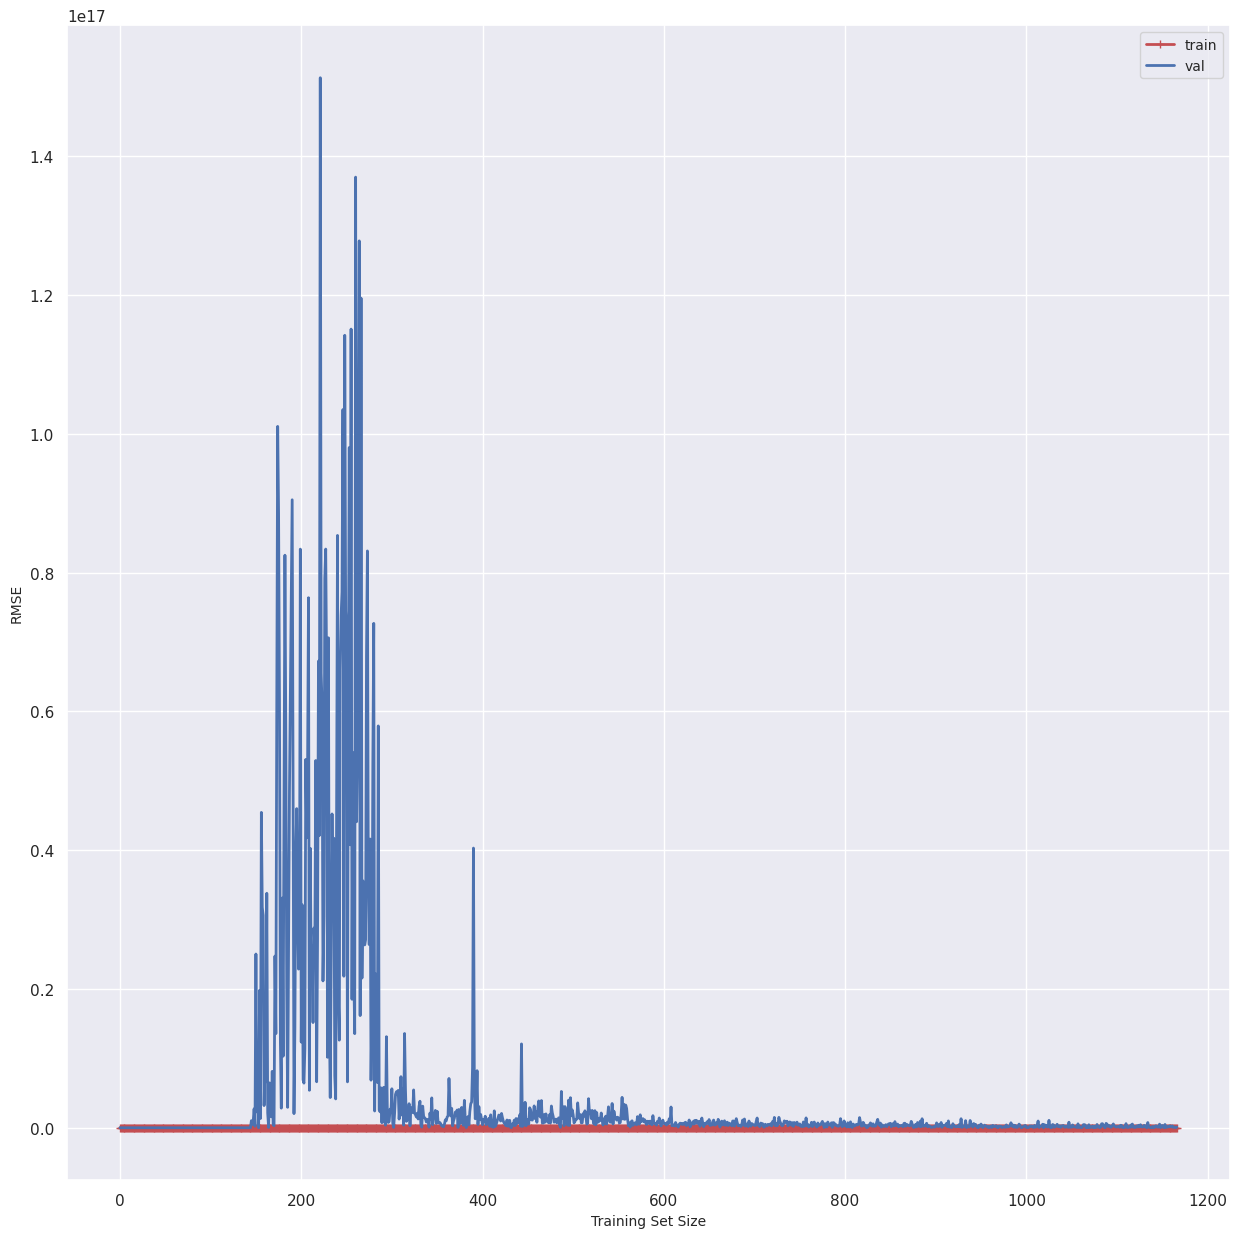

In [13]:
#Training set size = 1460 observations
#Validatios set size = 292 observations
#The graph shows =  1168 observations

#Output of the graph
    #Considering the information displayed by the graph we should apply any "Regularization Method"
    #Red line = training set:
        #Shows RMSE value = 0; therefore, is overfitting
    #Blue line = validation set
        #Shows RMSE value near to zero in almost the entire training set

def plot_learning_curves(linear_model, x_training, y_training):
    X_train, X_val, Y_train, Y_val = train_test_split(x_training, y_training, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        linear_model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = linear_model.predict(X_train[:m])
        Y_val_predict = linear_model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m], Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=10)  
    plt.xlabel("Training Set Size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)              
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x_training, y_training)
plt.show()            

## __7.3. Regularization of Linear Models__

1. "Regularization" helps to reduce the conditions of "Overfitting" in a linear model. There are usually 2 ways to deal with this issue:

> Reduce the number of polynomials degrees of freedom.

> Constraints the "weights" (also called "parameters"). The most used methods to constraints the "weights" are "Ridge Regression, Lasso, and Elastic Net".

2. "Ridge Regression, Lasso, or Elastic Net" is basically "a new term" (to keep the "weights" of the linear model as small as possible) added to the "Cost Function" (which main purpose is to fit the data) 

> "Ridge Regression, Lasso, or Elastic Net" is only added to the "Cost Function" during the training phase.

3. To work with "Ridge Regression, and Lasso" it is important to take into account the hyperparameter "alpha".The hyperparameter "alpha" controls the level of regularization of the model. 

> Large values of hyperparameter "alpha": weights tends to go to zero (extreme regularization = almos a horizontal line).

> Small values of hyperparameter "alpha": weights remain almost the same (i.e. almost no regularization).

3. To work with "Elastic Net" it is important to take into account the hyperparameter "alpha" (discussed previously) and ratio "r", which controls the level mix of "Ridge Regression, and Lasso Regression"

> ratio "r = 1": "Elastic Net = Lasso Regression"

> ratio "r = 0": "Elastic Net = Ridge Regression"

4. "Ridge Regression, Lasso, and Elastic Net" will be described in the following chart.

|Method|Concept|Main characteristics|
|--|--|--|
|Ridge Regression (also called "Tikhonov Regularization")|The "regularization" term represents the L2 Norm of weights. By default it is a good option.|It is sensitive to outliers; therefore, it is recommended to apply "Feature Scaling" before applying "Ridge Regression"|--|
|Lasso Regression (also called "Least Absolute Shrinkage and Selection Operator Regression")|The "regularization" term represents the L1 Norm of weights|It tends to eliminate (move to zero) the weights of the least important features (i.e. it performs feature selection; therefore, it is a good option if we believe that only a few features are useful). It decrements the parameters equally (i.e. at the same pace)|
|Elastic Net|It is a mix of Ridge and Lasso|It is preferred over Lasso because Lasso behave erraticaly if number of features is greater than number of observations or when we have strong correlated variables|



## __7.3.1. Regularization of Linear Models (Ridge Regression)__

In [14]:
#This is the "Ridge Regression Closed-Form Solution" (i.e. using the "Normal Equation")

ridge_regression = Ridge(alpha = 1, solver="cholesky")
ridge_regression.fit(x_training, y_training)
y_prediction_ridge = ridge_regression.predict(x_training)

mse_ridge = mean_squared_error(y_training, y_prediction_ridge)
r2_ridge = r2_score(y_training, y_prediction_ridge) 

print(f"Mean squared error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")

Mean squared error: 561045676.7790467
R-squared: 0.9110409887399178


## __7.3.2. Regularization of Linear Models (Lasso Regression)__

In [15]:
lasso_regression = Lasso(alpha = 3)
lasso_regression.fit(x_training, y_training)
y_prediction_lasso = lasso_regression.predict(x_training)

mse_lasso = mean_squared_error(y_training, y_prediction_lasso)
r2_lasso = r2_score(y_training, y_prediction_lasso) 

print(f"Mean squared error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")

Mean squared error: 505672664.8518158
R-squared: 0.9198208948962557


## __7.3.3. Regularization of Linear Models (Elastic Net)__

In [16]:
elastic_regression = ElasticNet(alpha = 0.01, l1_ratio=0.8)
elastic_regression.fit(x_training, y_training)
y_prediction_elastic = elastic_regression.predict(x_training)

mse_elastic = mean_squared_error(y_training, y_prediction_elastic)
r2_elastic = r2_score(y_training, y_prediction_elastic) 

print(f"Mean squared error: {mse_elastic}")
print(f"R-squared: {r2_elastic}")

Mean squared error: 613362658.4769255
R-squared: 0.9027456446055969


## __7.3.4. Linear Model (NO Regularization)__

In [17]:
#Building the linear regression model
linear_model = LinearRegression()
linear_model.fit(x_training, y_training)

# Predict the values of y
y_prediction = linear_model.predict(x_training)

# Compute the "mean squared error" and the Coefficient of Determination "R-squared"

    #Coefficient of Determination "R-squared": it measures the proportion of the "dependent variable" that
    #...can be explained by the "independent variables" (Range: 0 to 1). If the value of "R-squared" is
    #...near to 1 then the greater the explanatory power of the regression equation and better the...
    #...prediction of the dependent variable.
    
mse = mean_squared_error(y_training, y_prediction) 
r2 = r2_score(y_training, y_prediction)

print(f'Mean squared error: {mse}')
print(f'R-squared: {r2}')

Mean squared error: 504671553.83150685
R-squared: 0.9199796303615027


# __8. Testing the Model - Test Dataset__

## __8.1. Adjusting the Test Dataset__

In [18]:
#Dataframe of features of the test dataset
x_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
x_test
print("\n", '\033[1m','\033[94m',"Dataframe of test dataset",'\033[0m', "\n")
print(x_test)

#Dataframe of certain numerical + categorical features of the test dataset (transformed by full pipeline)
    #This "pipeline" comes from section "Pipeline - Part 2: "Feature Scaling + Imputation + Data Transformation + One Hot Encoding" - Training Dataset (only certain numerical features)"
    #In other words, we want to edit/modify the test dataset in the same way we did with the training set. As a result we are going to get the same number of columns of the training set.
#Important: do not use the command "fit" when we work with "test dataset".
x_test_transformed = full_pipeline.transform(x_test)
print("\n", '\033[1m','\033[94m',"Array of certain numerical + categorical feature of the test dataset (transformed by full pipeline)",'\033[0m', "\n")
print(x_test_transformed)

#Printing the "Datatype of the Array of certain numerical + categorical feature of the test dataset (transformed by full pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Array of certain numerical + categorical feature of the test dataset (transformed by full pipeline)",'\033[0m', "\n")
print(type(x_test_transformed))
print("\n", '\033[1m','\033[94m',"Shape of the Array of certain numerical + categorical feature of the test dataset (transformed by full pipeline)",'\033[0m', "\n")
print(x_test_transformed.shape)


   Dataframe of test dataset  

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour U

## __8.2. Applying Linear Regression - Test Dataset__

In [19]:
#Applying the "model" learned from the training set.
    #This model came from section "7.3.3. Regularization of Linear Models (Elastic Net)"
    #This model is applied to our "Array of certain numerical + categorical feature of the test dataset" derived from section "8.1. Adjusting the Test Dataset"
test_model = elastic_regression 
test_prediction = elastic_regression.predict(x_test_transformed)
print("\n", '\033[1m','\033[94m',"Array of the of predicted labels (test set)",'\033[0m', "\n")
test_prediction

mse = mean_squared_error(y_training, test_prediction) 
print(f'Mean squared error: {mse}')


   Array of the of predicted labels (test set)  



ValueError: Found input variables with inconsistent numbers of samples: [1460, 1459]

## __8.3. Preparing the outputs to be submitted__

In [ ]:
#Converting the "NumPy array" in a "Dataframe"
    #The nump "NumPy array" came from section "12.2. Applying Logistic Regression - Test Dataset"
test_prediction_df = pd.DataFrame(test_prediction, columns = ['Survived'])
print("\n", '\033[1m','\033[94m',"Dataframe of the of predicted labels (test set)",'\033[0m', "\n")
print(test_prediction_df)

In [ ]:
#Joining the dataframe of predictions of the test dataset (that only has the column of "Survived") and the original dataframe of "Test Set"
    #The original dataframe comes from section "12.1. Adjusting the Test Dataset"
    #The dataframe (previously created) of predictions of the test dataset comes from section "12.3. Preparing the outputs to be submitted"
    #Both dataframes have the same quantity of rows (418)
    
    #After the joining process, I am going to drop all the unnecessary columns (i.e. we are going to follow the rules about the submission file format requested by Kaggle)
        #Submission file format (according to Kaggle):  
            #The file should have exactly 2 columns:
                #PassengerId (sorted in any order)
                #Survived (contains your binary predictions: 1 for survived, 0 for deceased)
SubmissionFile_Logistic = x_test.join(test_prediction_df,how="inner")
SubmissionFile_Logistic.drop(SubmissionFile_Logistic.iloc[:, 1:11], inplace=True, axis=1)
print("\n", '\033[1m','\033[94m',"Submmitted Dataframe",'\033[0m', "\n")
print(SubmissionFile_Logistic)

In [ ]:
#Tranforming the file from "Dataframe" (previously created) to a "CSV File"
#Submission file format (according to Kaggle):  
    #Submit a csv file with exactly 418 entries plus a header row. 
    #Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.
Submission_Final = SubmissionFile_Logistic.to_csv('Submission_Final.csv', index = False)

# __References__

1. **Multivariate Data Analysis (Seventh Edition)**
> Joseph F. Hair Jr / William C. Black / Barry J. Babin / Rolph E. Anderson

2. **An Introduction to Statistical Learning**
> Gareth James / Daniela Witten / Trevor Hastie / Robert Tibshirani

3. **Hands-on Machine Learning with Scikit Learn, Keras and TensorFlow (Second Edition)**
> Aurélien Gerón

## <span style="color:red"> __Opportunities for enhancement__</span>

1. Transformation of the data 

> Using Pipelines (Adding polynomials variables)

> Using Pipelines (Transforming the data)